In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

import EDA_functions as func

In [2]:
site = "H"

In [3]:
# load the data
# get parent directory
os.chdir("..")
data_directory = 'Data'

data_name = site + "_TurbineData.csv"
flag_name = site + "_FullPerformanceFlag.csv"

# read the data
data = pd.read_csv(os.path.join(os.getcwd(), data_directory, data_name))
flag = pd.read_csv(os.path.join(os.getcwd(), data_directory, flag_name))

# reset to current directory
fd = sys.path[0]
os.chdir(fd)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159510 entries, 0 to 1159509
Data columns (total 27 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Unnamed: 0                     1159510 non-null  int64  
 1   ts                             1159510 non-null  object 
 2   instanceID                     1159510 non-null  object 
 3   AoARel                         0 non-null        float64
 4   bladePitch                     0 non-null        float64
 5   bladePitchMax                  0 non-null        float64
 6   bladePitchMin                  0 non-null        float64
 7   bladePitchSetPoint             0 non-null        float64
 8   bladePitchStd                  0 non-null        float64
 9   cP                             1132646 non-null  float64
 10  generatorTorque                994737 non-null   float64
 11  rotorTorque                    986041 non-null   float64
 12  TI            

In [5]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159510 entries, 0 to 1159509
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1159510 non-null  int64 
 1   ts          1159510 non-null  object
 2   instanceID  1159510 non-null  object
 3   value       1159510 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 35.4+ MB


In [6]:
# print the number of turbines and the turbine IDs
turbine_count = data['instanceID'].nunique()
turbine_name = data['instanceID'].unique()
print(turbine_count)
print(turbine_name)

22
['H_WTG01' 'H_WTG02' 'H_WTG03' 'H_WTG04' 'H_WTG05' 'H_WTG06' 'H_WTG07'
 'H_WTG08' 'H_WTG09' 'H_WTG10' 'H_WTG11' 'H_WTG12' 'H_WTG13' 'H_WTG14'
 'H_WTG15' 'H_WTG16' 'H_WTG17' 'H_WTG18' 'H_WTG19' 'H_WTG20' 'H_WTG21'
 'H_WTG22']


In [7]:
# add the boolean flag signal to the data
data['value'] = flag['value']

# drop irrelevant columns
data = data.drop(columns = ['AoARel', 'bladePitch', 'bladePitchMax',
       'bladePitchMin', 'bladePitchSetPoint', 'bladePitchStd', 'cP',
       'generatorTorque', 'rotorTorque', 'TSR',
       'Wind_direction', 'Nacelle_position', 'Nacelle_temperature',
       'Rotor_speed', 'Power_Minimum', 'Power_Maximum', 'Generator_RPM', 'Generator_RPM_Max',
       'Generator_RPM_Min'])

In [8]:
# Add month, day, and hour
data['ts'] = pd.to_datetime(data['ts'], format = '%d-%b-%Y %H:%M:%S')
data['Month'] = data.ts.dt.month
data['Day'] = data.ts.dt.day
data['Hour'] = data.ts.dt.hour

In [9]:
data.columns.values

array(['Unnamed: 0', 'ts', 'instanceID', 'TI', 'Wind_speed', 'Power',
       'Ambient_temperature', 'Wind_speed_Standard_deviation', 'value',
       'Month', 'Day', 'Hour'], dtype=object)

In [10]:
# Rearrange columns
data = data.reindex(columns = ['ts',  'Month' , 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_Standard_deviation', 
                               'TI', 'Ambient_temperature', 'Power', 'value'])

# rename columns 
data.columns = ['ts',  'Month', 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_sd', 'TI', 
                'Temperature', 'Power', 'value']

In [11]:
data.describe()

,Month,Day,Hour,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
count,1.159510e+06,1.159510e+06,1.159510e+06,1.149476e+06,1.147606e+06,0.0,1.147957e+06,1.149476e+06,1.159510e+06
mean,6.513557e+00,1.575655e+01,1.149978e+01,7.359706e+00,1.276415e+00,NaN,1.744755e+01,1.540681e+02,6.767557e-01
std,3.451286e+00,8.811684e+00,6.922305e+00,4.969987e+00,7.191447e-01,NaN,6.197161e+00,1.698261e+02,4.677153e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,-9.900000e+01,-2.900000e+01,0.000000e+00
25%,4.000000e+00,8.000000e+00,5.000000e+00,3.500000e+00,7.700000e-01,NaN,1.300000e+01,0.000000e+00,0.000000e+00
50%,7.000000e+00,1.600000e+01,1.100000e+01,6.300000e+00,1.180000e+00,NaN,1.700000e+01,7.900000e+01,1.000000e+00
75%,1.000000e+01,2.300000e+01,1.700000e+01,1.060000e+01,1.670000e+00,NaN,2.100000e+01,3.000000e+02,1.000000e+00
max,1.200000e+01,3.100000e+01,2.300000e+01,4.110000e+01,8.770000e+00,NaN,9.700000e+01,5.330000e+02,1.000000e+00


### Calculate TI

In [12]:
data['TI'] = (data['Wind_speed_sd']/data['Wind_speed'])*100

In [13]:
data.sample(5, random_state = 10)

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
271931,2020-03-26 20:00:00,3,26,20,H_WTG12,6.1,0.95,15.573771,13.0,65.000000,1
746516,2020-08-23 15:20:00,8,23,15,H_WTG13,9.9,1.30,13.131313,20.0,319.600006,1
567258,2020-06-28 01:20:00,6,28,1,H_WTG11,12.2,1.82,14.918033,18.0,456.299988,1
158565,2020-02-20 01:10:00,2,20,1,H_WTG12,15.0,2.30,15.333333,15.0,473.000000,1
340625,2020-04-17 12:20:00,4,17,12,H_WTG22,8.7,1.95,22.413794,22.0,271.799988,1


### Plot time series

In [14]:
# select one turbine
data_01 = data[data['instanceID'] == site + '_WTG01']

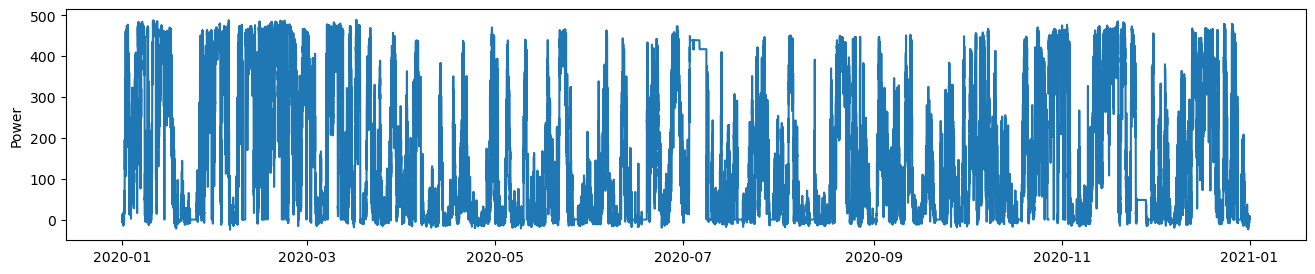

In [15]:
func.plot_timeseries(data_01, 'Power')

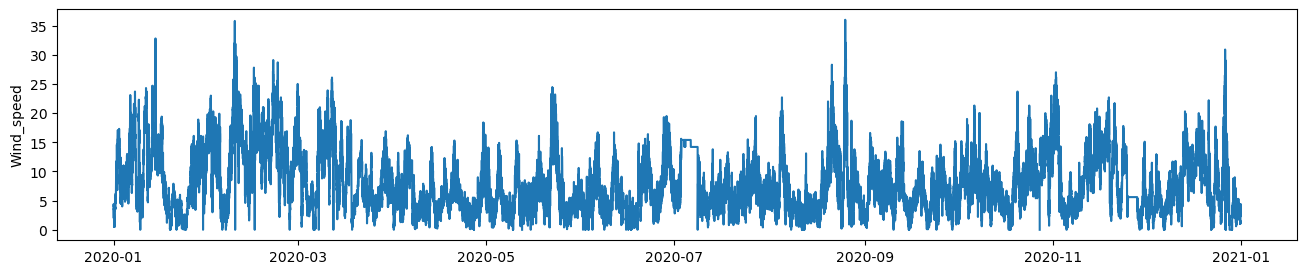

In [16]:
func.plot_timeseries(data_01, 'Wind_speed')

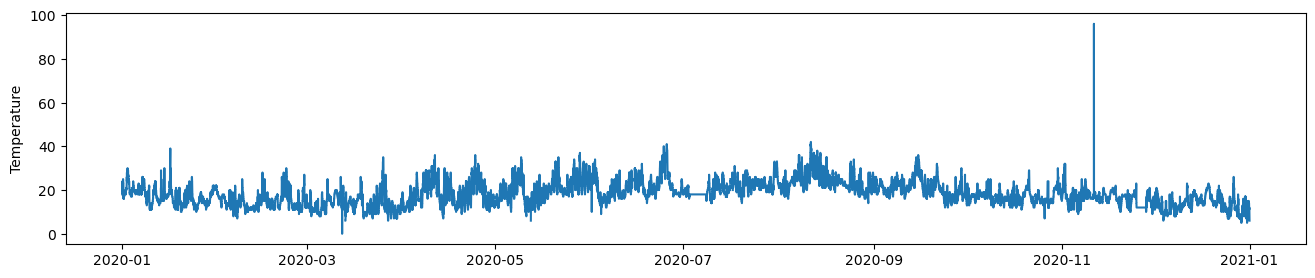

In [17]:
func.plot_timeseries(data_01, 'Temperature')

### Full performance data

In [18]:
# sort the turbine IDs and create a list of the IDs
instanceID = sorted(data.instanceID.unique().tolist())
ID = [instanceID[i][5:] for i in range (len(instanceID))] 

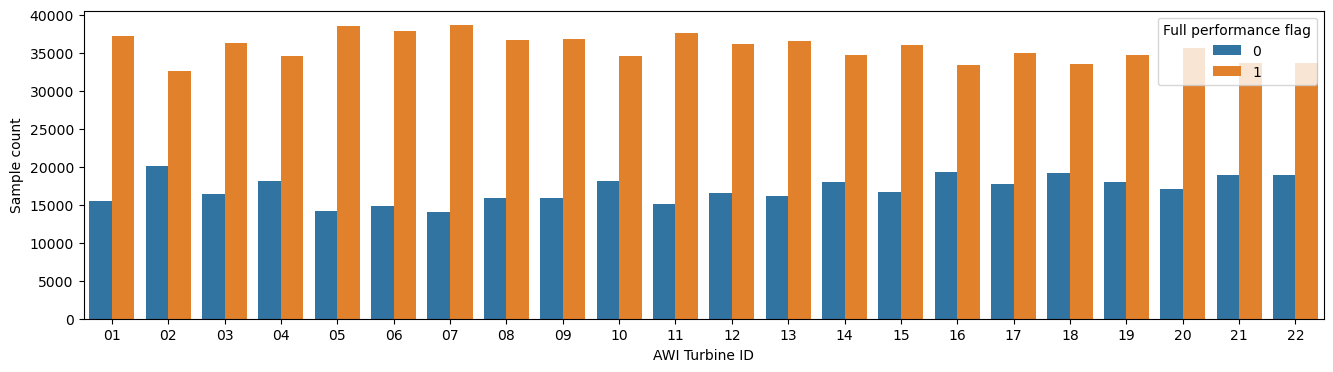

In [19]:
# Plot bar chart of full performance flag vs sample count for each turbine
bar = data.groupby(by=['instanceID','value']).count().reset_index()
func.plot_fullperformanceflag(df=bar, order=instanceID, ticklabels=ID, figsize = (16,4), orient = "v")

In [20]:
# only select rows with flag value = 1
data = data[data['value'] == 1]

# drop irrelevant columns 
data = data.drop(columns = ['value'])

In [21]:
data

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power
0,2020-01-01 00:00:00,1,1,0,H_WTG01,4.1,0.45,10.975610,18.0,2.0
1,2020-01-01 00:00:00,1,1,0,H_WTG02,3.9,0.95,24.358973,12.0,3.0
5,2020-01-01 00:00:00,1,1,0,H_WTG06,3.7,0.63,17.027027,14.0,2.0
6,2020-01-01 00:00:00,1,1,0,H_WTG07,5.3,0.63,11.886792,11.0,41.0
7,2020-01-01 00:00:00,1,1,0,H_WTG08,4.5,0.84,18.666666,10.0,23.0
...,...,...,...,...,...,...,...,...,...,...
1159448,2020-12-31 23:40:00,12,31,23,H_WTG05,3.4,0.45,13.235293,6.0,3.0
1159458,2020-12-31 23:40:00,12,31,23,H_WTG15,3.7,0.89,24.054053,3.0,31.0
1159468,2020-12-31 23:50:00,12,31,23,H_WTG03,4.1,0.77,18.780488,7.0,1.0
1159480,2020-12-31 23:50:00,12,31,23,H_WTG15,2.9,0.71,24.482757,3.0,16.0


In [22]:
# remove invalid values and null entries. 
# acceptable TI range: [0, 100]
# acceptable temperature range: [-5, 40]
data_clean = func.clean_data(data)
data_clean

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power
0,2020-01-01 00:00:00,1,1,0,H_WTG01,4.1,0.45,10.975610,18.0,2.0
1,2020-01-01 00:00:00,1,1,0,H_WTG02,3.9,0.95,24.358973,12.0,3.0
5,2020-01-01 00:00:00,1,1,0,H_WTG06,3.7,0.63,17.027027,14.0,2.0
6,2020-01-01 00:00:00,1,1,0,H_WTG07,5.3,0.63,11.886792,11.0,41.0
7,2020-01-01 00:00:00,1,1,0,H_WTG08,4.5,0.84,18.666666,10.0,23.0
...,...,...,...,...,...,...,...,...,...,...
1159448,2020-12-31 23:40:00,12,31,23,H_WTG05,3.4,0.45,13.235293,6.0,3.0
1159458,2020-12-31 23:40:00,12,31,23,H_WTG15,3.7,0.89,24.054053,3.0,31.0
1159468,2020-12-31 23:50:00,12,31,23,H_WTG03,4.1,0.77,18.780488,7.0,1.0
1159480,2020-12-31 23:50:00,12,31,23,H_WTG15,2.9,0.71,24.482757,3.0,16.0


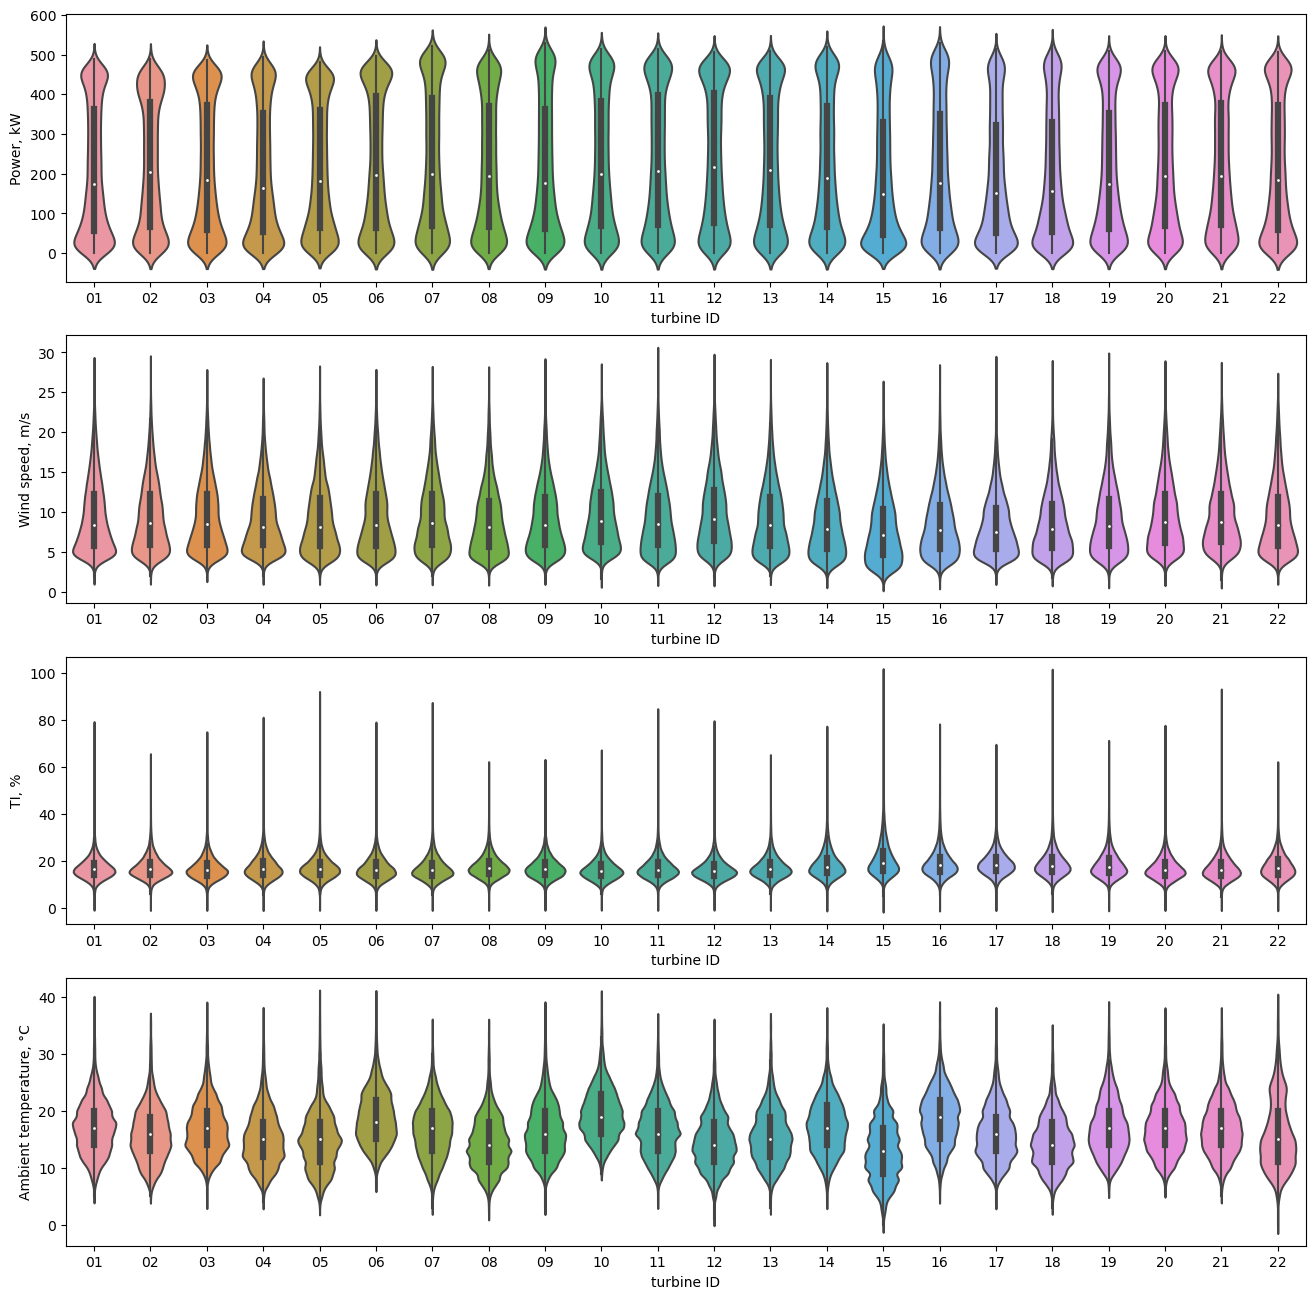

In [23]:
# Make violin plots of the variables 
var = [ 'Power','Wind_speed', 'TI','Temperature']
var_name = [ 'Power, kW','Wind speed, m/s', 'TI, %','Ambient temperature, °C']

func.plot_violinplot(df=data_clean, var=var, var_name=var_name, order=instanceID, 
                ticklabels=ID, figsize=(16, 16), orient = "v")

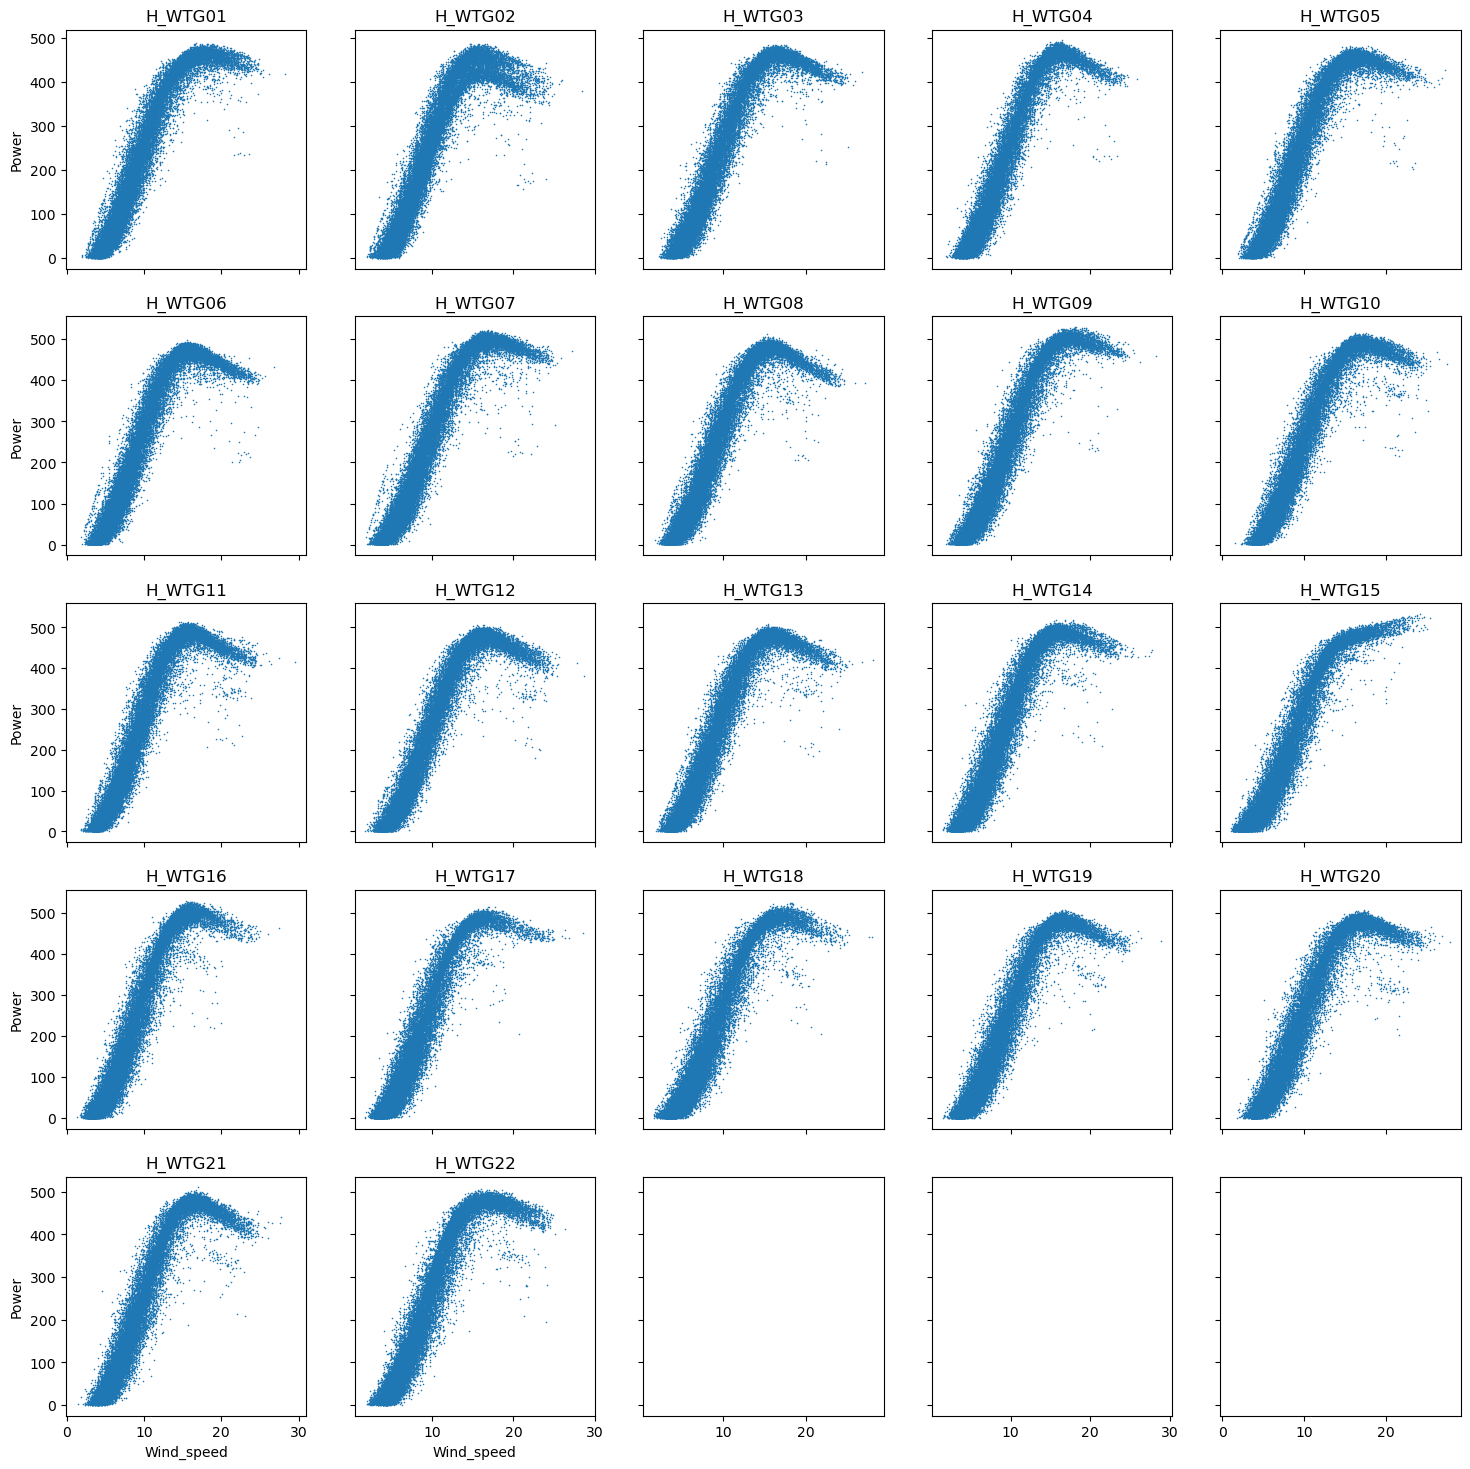

In [24]:
# Plot power curve for each turbine
func.plot_powercurve(df=data_clean, order=instanceID, figsize=(18,18))

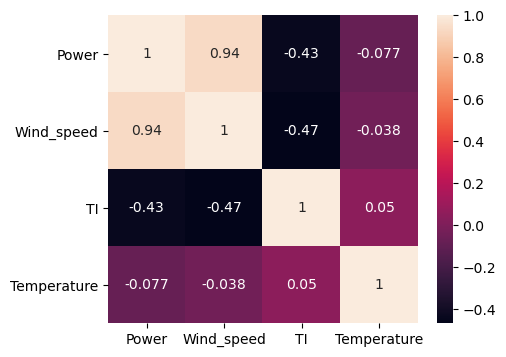

In [25]:
# Plot correlation between variables
plt.figure(figsize = (5,4))
sns.heatmap(data_clean[var].corr(), annot=True)
plt.show()

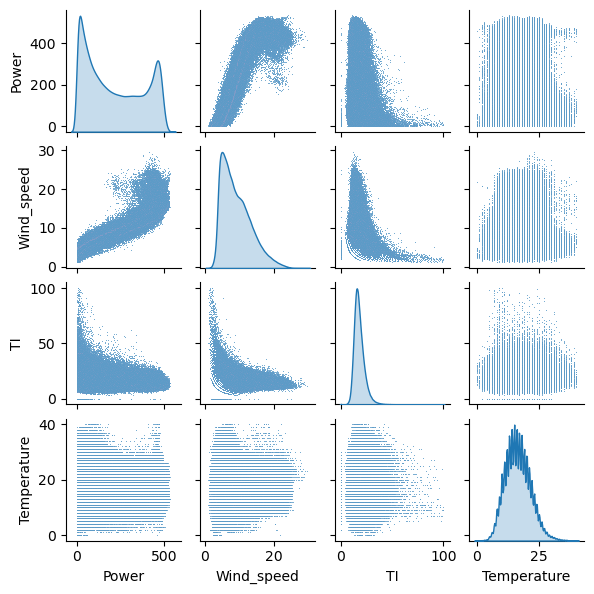

In [26]:
# Make pairplot of the variables
sns.pairplot(data_clean, vars = var, diag_kind = 'kde', plot_kws={'s' : 0.5}, height = 1.5)
plt.show()

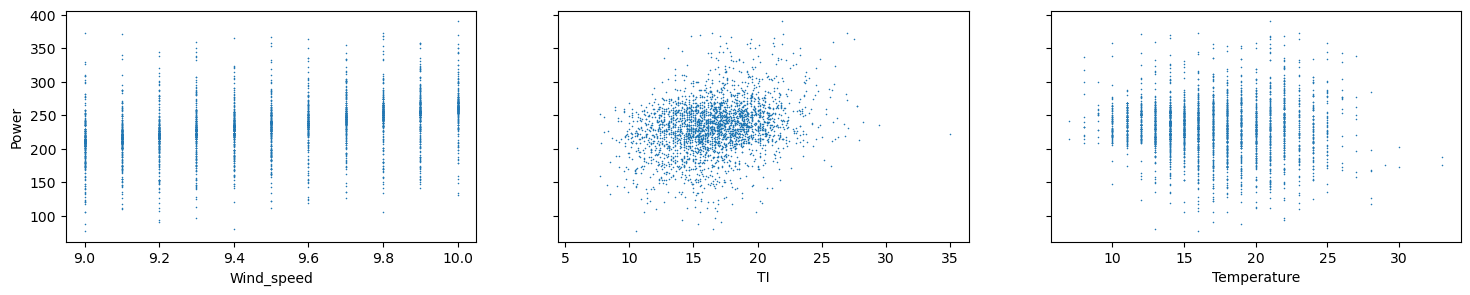

In [27]:
x_var = ["Wind_speed", "TI", "Temperature"]
func.plot_vars(df=data_clean, turbine_name= site + "_WTG01", ws_range=(9,10), x_var = x_var, figsize=(18,3))

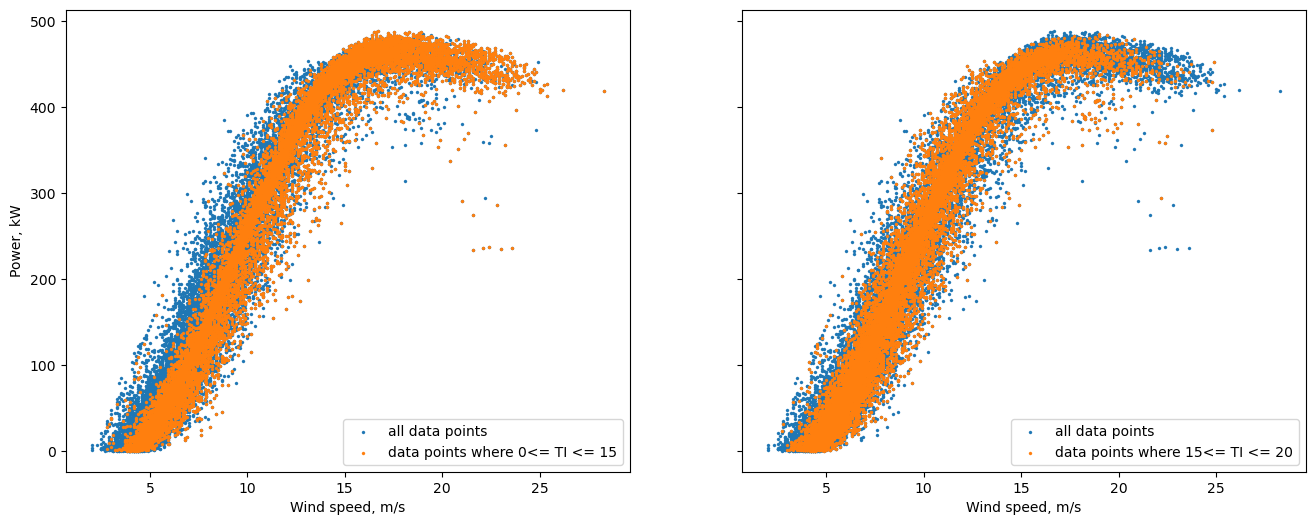

In [46]:
func.plot_TIeffect(df=data_clean, turbine_name= site + "_WTG01", ws_range1 = (0, 15), ws_range2 = (15, 20), figsize=(16,6))

### Split data

In [47]:
# define training size and thus number of samples per turbine
train_size = 10000

In [48]:
# sample the data. select equal number of training samples from each turbine. 
data_train = data_clean.groupby('instanceID', group_keys=False).apply(lambda x: x.sample(train_size, 
                                                                                 random_state = 22))

In [49]:
data_train

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power
645128,2020-07-22 15:20:00,7,22,15,H_WTG01,6.7,1.58,23.582091,23.0,103.800003
121440,2020-02-08 08:00:00,2,8,8,H_WTG01,10.7,1.61,15.046729,12.0,297.000000
273416,2020-03-27 07:20:00,3,27,7,H_WTG01,5.1,0.32,6.274510,6.0,30.000000
939928,2020-10-23 16:40:00,10,23,16,H_WTG01,8.6,0.95,11.046511,16.0,158.399994
281776,2020-03-29 22:40:00,3,29,22,H_WTG01,6.1,0.84,13.770492,8.0,110.000000
...,...,...,...,...,...,...,...,...,...,...
521377,2020-06-13 13:40:00,6,13,13,H_WTG22,4.7,1.41,30.000001,29.0,36.099998
11945,2020-01-04 18:20:00,1,4,18,H_WTG22,8.5,1.55,18.235294,11.0,186.000000
452451,2020-05-22 19:30:00,5,22,19,H_WTG22,15.4,1.76,11.428572,20.0,477.799988
482041,2020-06-01 03:40:00,6,1,3,H_WTG22,4.6,0.55,11.956522,20.0,11.400000


### Export data

In [50]:
# data_clean.to_csv("C://Users//User//Desktop//Wind-turbine-performance-modelling//Data_clean//" + site + "_data_clean.csv")

In [51]:
# data_train.to_csv("C://Users//User//Desktop//Wind-turbine-performance-modelling//Data_clean//" + site + "_data_train.csv")